# Limpieza y Preparación de Datos con Pandas

**Objetivo:** Aprender a identificar y solucionar los problemas más comunes en datasets "crudos" utilizando `pandas`. Transformaremos el famoso dataset del Titanic de un estado desordenado a uno listo para el análisis y modelado.

## 1. Introducción

En la vida real, los datos rara vez vienen listos para ser analizados. Suelen tener problemas como:
- **Valores Faltantes:** Celdas vacías que impiden cálculos.
- **Datos Incorrectos:** Errores de tipeo o valores imposibles (ej. edad = -5).
- **Formatos Inconsistentes:** Fechas como 'dd/mm/aa' y 'yyyy-mm-dd' en la misma columna.
- **Columnas Irrelevantes:** Datos que no aportan valor al análisis (ej. IDs).

Hoy seremos científicos de datos investigando el naufragio del Titanic. Nuestro objetivo es limpiar los datos de los pasajeros para que, en el futuro, podamos construir un modelo que prediga la supervivencia.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos seaborn para un estilo visual más agradable
sns.set_theme(style="whitegrid")

### Primer Vistazo al Dataset del Titanic

In [7]:
# Cargamos el dataset directamente desde la librería seaborn
df = sns.load_dataset('titanic')

print("Primeras 5 filas del dataset:")
display(df.head())

Primeras 5 filas del dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
print("Información general y tipos de datos:")
df.info()

Información general y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


**Observaciones Iniciales (Storytelling):**

De inmediato, `.info()` nos revela problemas críticos:
- `age`: Le faltan casi 200 valores (891 - 714).
- `deck`: ¡Le faltan muchísimos valores! (891 - 203). ¿Será útil?
- `embarked` y `embark_town`: Tienen un par de valores faltantes.

Visualicemos la distribución de la edad para entender el impacto de esos datos faltantes.

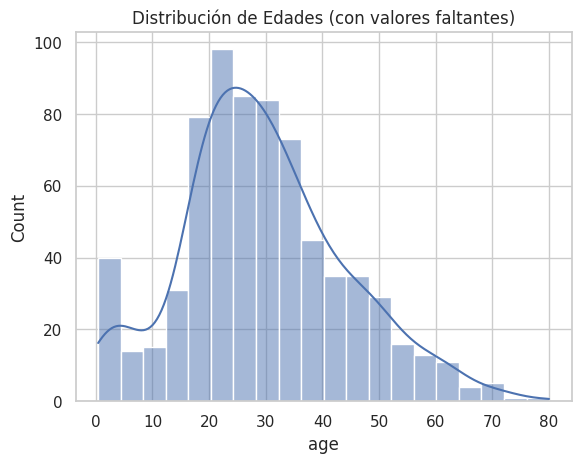

In [9]:
sns.histplot(df['age'], kde=True)
plt.title('Distribución de Edades (con valores faltantes)')
plt.show()

## 2. Manejo de Datos Faltantes (Missing Data)

Nuestra primera tarea es decidir qué hacer con las celdas vacías (`NaN`). Las estrategias principales son **eliminar** o **imputar** (rellenar).

> *Pandas reconoce los valores `None` y los trata como `NaN`.*

### Ejemplo Minimalista

In [20]:
df_simple = pd.DataFrame({'col1': [1, 2, None, 4], 'col2': ['A', np.nan, 'C', 'D']})
print("DataFrame simple con NaNs:")
display(df_simple)

print("\nDetectando NaNs con .isna():")
display(df_simple.isna())

print("\nEliminando filas con cualquier NaN con .dropna():")
display(df_simple.dropna())

print("\nRellenando NaNs con un valor (0) con .fillna():")
display(df_simple.fillna(0))

DataFrame simple con NaNs:


,col1,col2
0,1.0,A
1,2.0,NaN
2,NaN,C
3,4.0,D



Detectando NaNs con .isna():


,col1,col2
0,False,False
1,False,True
2,True,False
3,False,False



Eliminando filas con cualquier NaN con .dropna():


,col1,col2
0,1.0,A
3,4.0,D



Rellenando NaNs con un valor (0) con .fillna():


,col1,col2
0,1.0,A
1,2.0,0
2,0.0,C
3,4.0,D


### Aplicación al Caso Real (Titanic)

Nuestra estrategia será:
- **`age`**: Rellenar con la mediana. La mediana es más robusta a outliers que la media.
- **`embarked`**: Rellenar con la moda (el valor más frecuente), ya que es una variable categórica.
- **`deck`**: Tiene demasiados valores faltantes. Intentar rellenarlos podría introducir mucho ruido. Es mejor eliminar la columna.
- **`embark_town`**: No es relevante para el análisis que haremos a continuación, por ende, eliminaremos la columna.

In [32]:
# Hacemos una copia para no modificar el original
df_limpio = df.copy()

# Rellenar 'age' con la mediana
age_median = df_limpio['age'].median()
df_limpio['age'] = df_limpio['age'].fillna(age_median)

# Rellenar 'embarked' con la moda
embarked_mode = df_limpio['embarked'].mode()[0]
df_limpio['embarked'] = df_limpio['embarked'].fillna(embarked_mode)

# Eliminar la columna 'deck' y otras redundantes/innecesarias
df_limpio = df_limpio.drop(columns=['deck', 'embark_town'])

print("Resumen de nulos después del tratamiento:")
df_limpio.info()

Resumen de nulos después del tratamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    object  
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


¡Genial! Ya no tenemos valores nulos. Veamos cómo se ve ahora la distribución de edad:

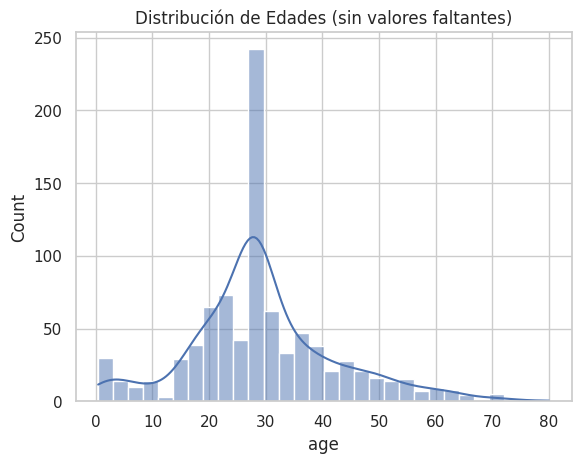

In [33]:
sns.histplot(df_limpio['age'], kde=True)
plt.title('Distribución de Edades (sin valores faltantes)')
plt.show()

## 3. Transformación de Datos

Ahora que no tenemos nulos, podemos transformar las columnas para que sean más útiles para el análisis.

### Variables Indicadoras (Dummy Variables)

Los modelos de Machine Learning necesitan números, no texto. Convertiremos las variables categóricas como `sex` y `embarked` en columnas numéricas usando One-Hot Encoding.

La función `pd.get_dummies` hace esto automáticamente.

In [36]:
# Ejemplo Minimalista
df_color = pd.DataFrame({'color': ['rojo', 'verde', 'azul', 'rojo'], 'tipo': ['claro', 'oscuro', 'claro', 'claro'], 'precio': [1,2,3,2]})
display(pd.get_dummies(df_color, columns=['color', 'tipo']))

,precio,color_azul,color_rojo,color_verde,tipo_claro,tipo_oscuro
0,1,False,True,False,True,False
1,2,False,False,True,False,True
2,3,True,False,False,True,False
3,2,False,True,False,True,False


In [37]:
# Aplicación al Caso Real (Titanic)
df_limpio = pd.get_dummies(df_limpio, columns=['sex', 'embarked'])

print("DataFrame con variables dummy:")
display(df_limpio.head())

DataFrame con variables dummy:


,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,alive,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,Third,man,True,no,False,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,First,woman,False,yes,False,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,Third,woman,False,yes,True,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,First,woman,False,yes,False,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,Third,man,True,no,True,False,True,False,False,True


## 4. Calidad Técnica: Creando un Pipeline con `.pipe()`

Hemos realizado los pasos uno a uno, pero en un proyecto real, queremos que nuestro proceso de limpieza sea **reproducible** y **ordenado**. La mejor práctica para esto es encapsular cada paso lógico en una función y luego encadenarlas con el método `.pipe()`.

In [121]:
# Paso 1: Definir nuestras funciones de limpieza

def tratar_faltantes(df):
    """Rellena valores faltantes y elimina columnas con demasiados nulos."""
    df_copy = df.copy()
    # Usamos .assign() para encadenar operaciones de forma legible
    df_copy = df_copy.assign(
        age = lambda d: d['age'].fillna(d['age'].median()),
        embarked = lambda d: d['embarked'].fillna(d['embarked'].mode()[0])
    )
    return df_copy

def eliminar_columnas_irrelevantes(df):
    """Elimina columnas que no aportan al análisis o son redundantes."""
    return df.drop(columns=['deck', 'embark_town'])

def crear_variables_dummy(df):
    """Convierte variables categóricas a formato numérico."""
    return pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

# Paso 2: Cargar los datos crudos de nuevo
df_raw = sns.load_dataset('titanic')

# Paso 3: Ejecutar el pipeline
df_final = (
    df_raw
    .pipe(tratar_faltantes)
    .pipe(eliminar_columnas_irrelevantes) # Podríamos agregar más pasos aquí
    .pipe(crear_variables_dummy) 
)

print("Información del DataFrame final procesado con el pipeline:")
df_final.info()

print("\nHead del DataFrame final:")
display(df_final.head())

Información del DataFrame final procesado con el pipeline:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   age         891 non-null    float64 
 3   sibsp       891 non-null    int64   
 4   parch       891 non-null    int64   
 5   fare        891 non-null    float64 
 6   class       891 non-null    category
 7   who         891 non-null    object  
 8   adult_male  891 non-null    bool    
 9   alive       891 non-null    object  
 10  alone       891 non-null    bool    
 11  sex_male    891 non-null    bool    
 12  embarked_Q  891 non-null    bool    
 13  embarked_S  891 non-null    bool    
dtypes: bool(5), category(1), float64(2), int64(4), object(2)
memory usage: 61.2+ KB

Head del DataFrame final:


,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,alive,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,Third,man,True,no,False,True,False,True
1,1,1,38.0,1,0,71.2833,First,woman,False,yes,False,False,False,False
2,1,3,26.0,0,0,7.9250,Third,woman,False,yes,True,False,False,True
3,1,1,35.0,1,0,53.1000,First,woman,False,yes,False,False,False,True
4,0,3,35.0,0,0,8.0500,Third,man,True,no,True,True,False,True


## 5. Conclusión y Visualización Final

Después de limpiar y preparar nuestros datos, ¡ahora podemos empezar a responder preguntas!

Por ejemplo, ¿cómo se relaciona el sexo con la supervivencia? Gracias a nuestra limpieza, podemos visualizarlo fácilmente.

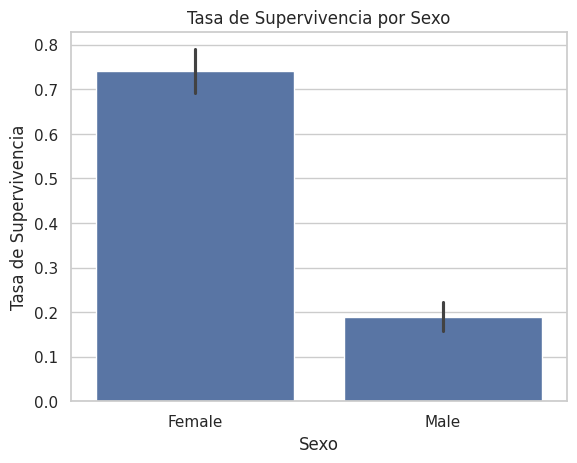

In [124]:
ax = sns.barplot(x='sex_male', y='survived', data=df_final)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Female', 'Male'])
plt.title('Tasa de Supervivencia por Sexo')
plt.ylabel('Tasa de Supervivencia')
plt.xlabel('Sexo')
plt.show()

**Storytelling Final:**

Como muestra el gráfico, las mujeres tuvieron una tasa de supervivencia mucho mayor. Este es el tipo de insight valioso que solo podemos obtener después de un proceso de limpieza de datos riguroso. ¡Nuestro dataset está listo para análisis más profundos!